<a href="https://colab.research.google.com/github/riteshdurgiani/SMAPracs/blob/main/SMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Content Analysis  


In [ ]:
!pip install pyLDAvis

In [ ]:
import pandas as pd
import nltk 
import gensim 
import pyLDAvis
import warnings
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from gensim.corpora.dictionary import Dictionary 
from gensim.models.ldamodel import LdaModel
import pyLDAvis.gensim

warnings.filterwarnings('ignore')



In [ ]:
#step 1 : Get the dataset 
dataset = pd.read_csv('tweets.csv')

#step2 get the stopwords , initialise lemmatizer
tokens = []
stopwrds = stopwords.words('english')
lemm = WordNetLemmatizer()

#step 3 : get the tokens 
for i,row in dataset.iterrows():
  row_tokens = word_tokenize(row.tweet.lower())
  #remove http / links  
  row_tokens = [token for token in row_tokens if not token.startswith('http')]
  #remove stop words 
  row_tokens = [token for token in row_tokens if token not in stopwrds]
  #remove numbers
  row_tokens = [token for token in row_tokens if token.isalpha()]
  #lemmatize 
  row_tokens = [lemm.lemmatize(token) for token in row_tokens]
  #add the tokens 
  tokens.append(row_tokens)

#step 4  : create word mapping gets unique tokens 
dictionary  = Dictionary(tokens) #wordid - > word mapping 
print(dictionary)

#step 5 : map word frequency id- > frequency 
corpus = [dictionary.doc2bow(row_tokens) for row_tokens in tokens]
print(corpus)

#step 6 : initalise lda model  
lda = LdaModel(corpus = corpus,num_topics = 10,id2word = dictionary, passes = 10,random_state=13 )


#step 7 : List the topics extracted 
for i,topic in lda.show_topics():
  print(f'Topic {i} : {topic}')

print()

#step 7 print perplexity 
print("LDA Model Perplexity : " , lda.log_perplexity(corpus))



In [ ]:
#step 8 : visualize
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda,corpus,dictionary)
pyLDAvis.save_html(vis,'lda_vis.html')

# Location Analysis 

           Country             City
1            India            Delhi
3            India        New Delhi
24   United States           Geneva
31   United States         Winnetka
35   United States         Winnetka
..             ...              ...
743  United States          Grenada
751          India        Ghaziabad
759  United States  St Clair Shores
767  United States          Florida
807       Pakistan          Karachi

[62 rows x 2 columns]

City Freq : 
Winnetka           10
Karachi            10
Chicago             5
Maine               2
Geneva              2
Dubai               2
Manhattan           2
Delhi               1
Evanston            1
India               1
Coral Gables        1
Potomac             1
Queens              1
Malden              1
Mumbai              1
Staten Island       1
South Carolina      1
Grenada             1
Ghaziabad           1
St Clair Shores     1
Bahrain             1
Port St Lucie       1
Fair Plain          1
Calicut Beach       1
New

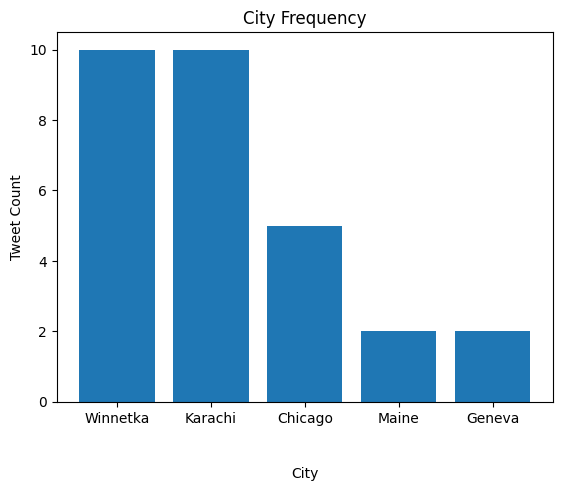

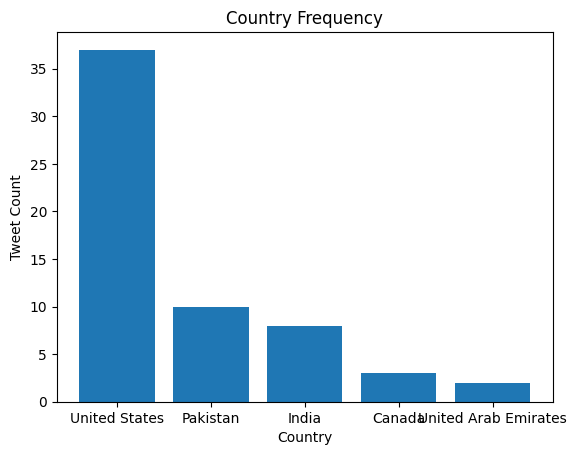

In [30]:
import pandas as pd
import ast 
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

#step 1  :get the dataset  
dataset = pd.read_csv('tweets.csv')

#step 2 create new colums  
dataset['Country'] = 'None'
dataset['City'] = 'None'

#step 3 Fill the Colums 

for i,row in dataset.iterrows():
  loc_data = ast.literal_eval(row['additional_data'])
  if loc_data['place']:
    dataset['Country'][i] = loc_data['place']['country']
    dataset['City'][i] = loc_data['place']['name']

#step 4 : Compress the datasetr 

dataset = dataset[dataset['Country'] != 'None']
print(dataset[['Country','City']])
print()

#step 5 : find city and country freq :

city_freq = dataset['City'].value_counts()
print('City Freq : ')
print(city_freq)
print()

country_freq = dataset['Country'].value_counts()
print('Country Count : ')
print(country_freq)
print()

#step 6 : Plot the values 

plt.bar(city_freq.index[:5],city_freq.values[:5])
plt.title('City Frequency')

plt.xlabel('City',labelpad=30)
plt.ylabel('Tweet Count')
plt.show()

plt.bar(country_freq.index[:5],country_freq.values[:5])
plt.title('Country Frequency')
plt.xlabel('Country')
plt.ylabel('Tweet Count')
plt.show()


# Trend Analysis


Date Frequency : 
2023-02-02    111
2023-01-02    108
2023-01-27     92
2023-03-02     90
2023-01-29     83
2023-01-30     76
2023-01-31     74
2023-01-26     65
2023-01-28     64
2023-04-02     50
2023-05-02     22
Name: date, dtype: int64

Hour Frequency 
18    59
15    56
19    56
17    51
14    50
23    47
16    46
22    42
1     38
21    35
6     33
2     32
4     31
11    29
9     29
20    29
0     29
13    28
3     24
10    23
8     20
5     16
7     16
12    16
Name: hour, dtype: int64



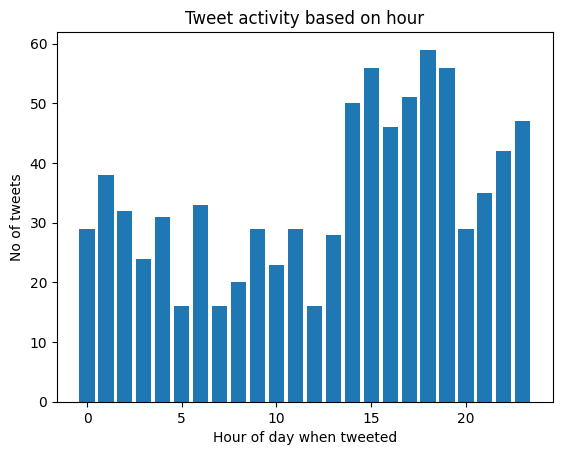

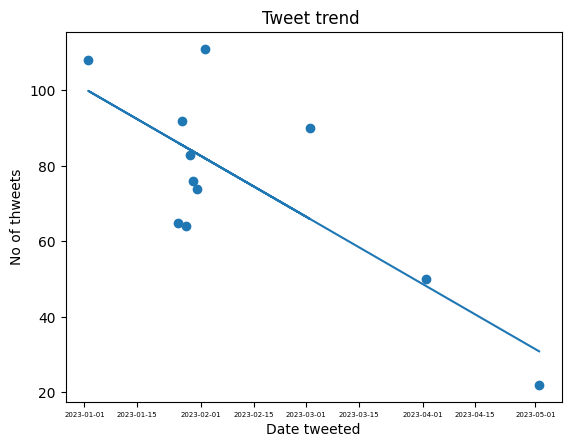

In [39]:
import pandas as pd
import matplotlib.pyplot as plt 
#addidtional
import matplotlib.dates as dates 
import numpy as np

#step 1 : read the dataset 
dataset = pd.read_csv("tweets.csv")
#truncate the dataset
dataset = dataset[['created_at','tweet']]

#step 2 : convert date to datetime
dataset['created_at'] =pd.to_datetime(dataset['created_at'])

#step 3 : add date and hour columns  
dataset['date'] = dataset['created_at'].dt.date
dataset['hour'] = dataset['created_at'].dt.hour

#step 4 get  frequency
date_frequency = dataset['date'].value_counts()
print('Date Frequency : ')
print(date_frequency)
print()

hour_frequency = dataset['hour'].value_counts()
print('Hour Frequency ')
print(hour_frequency)
print()

#step 5 : plot bar 
plt.bar(hour_frequency.index,hour_frequency.values)
plt.xlabel('Hour of day when tweeted')
plt.ylabel('No of tweets')
plt.title('Tweet activity based on hour')
plt.show()


plt.scatter(date_frequency.index,date_frequency.values)

x = date_frequency.index
#as we cannot plot trendline using date so convert to number 
x_num = dates.date2num(x) 
y = date_frequency.values
z = np.polyfit(x_num,y,deg=1)
p = np.poly1d(z)
plt.xticks(fontsize=5)
plt.plot(x,p(x_num))

plt.xlabel('Date tweeted')
plt.ylabel('No of thweets')
plt.title('Tweet trend ')

plt.show()

#Hashtag Analysis


In [ ]:
import pandas as pd
import ast 
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
# get the dataset 
dataset = pd.read_csv('tweets.csv')

#add new columns
dataset['Country'] = 'None'
dataset['Hashtag'] = ''

#fill the new colums 
for i,row in dataset.iterrows():
  loc_data = ast.literal_eval(row['additional_data'])
  hashtags = [token for token in row.tweet.split() if token.startswith('#')]
  dataset['Hashtag'][i] = hashtags

  if loc_data['place']:
    dataset['Country'][i] = loc_data['place']['country']

#squeeze the dataset 
dataset = dataset[dataset['Country'] != 'None']
dataset = dataset[['Country','Hashtag']]
#print(dataset)
dataset = dataset.explode('Hashtag')
#print(dataset)


#plot the bar 
for country in dataset['Country'].unique():
  dataset_country = dataset[dataset['Country'] == country]
 
  dataset_country['Hashtag'].value_counts().plot(kind = 'barh')
  plt.xlabel('Hashtag Count')
  plt.ylabel('Hashtags')
  plt.title(f'Hashtag Popularity in {country}')
  plt.show('')

  #this will run in pycharm , showing error here 
  

# Semtiment Analysis 

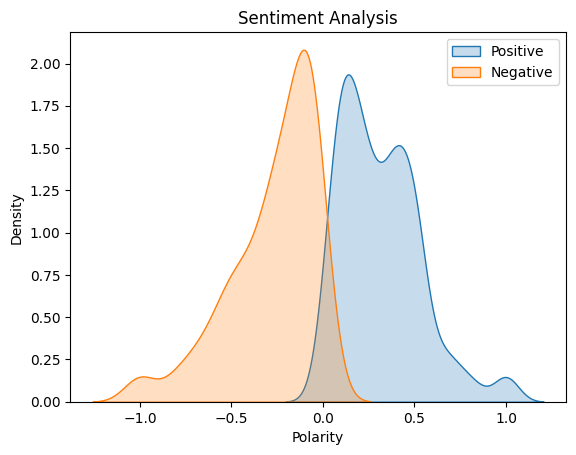

In [52]:
import pandas as pd
import nltk
import gensim
import pyLDAvis
import warnings

import textblob as textblob
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from gensim.corpora.dictionary import Dictionary
from gensim.models.ldamodel import LdaModel
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')
#step 1 : Get the dataset
dataset = pd.read_csv('tweets.csv')
dataset['sentiment'] = ''
dataset['polarity'] = 0.0

#step2 get the stopwords , initialise lemmatizer
tokens = []
stopwrds = stopwords.words('english')
lemm = WordNetLemmatizer()

#step 3 : get the tokens
for i,row in dataset.iterrows():
  row_tokens = word_tokenize(row.tweet.lower())
  #remove http / links
  row_tokens = [token for token in row_tokens if not token.startswith('http')]
  #remove stop words
  row_tokens = [token for token in row_tokens if token not in stopwrds]
  #remove numbers
  row_tokens = [token for token in row_tokens if token.isalpha()]
  #lemmatize
  row_tokens = [lemm.lemmatize(token) for token in row_tokens]
  # get the sentiment
  senti = TextBlob(' '.join(row_tokens))
  dataset['polarity'][i] = senti.sentiment.polarity
  if dataset['polarity'][i] > 0:
    dataset['sentiment'][i] = 'positive'
  elif dataset['polarity'][i] < 0:
    dataset['sentiment'][i] = 'negative'
  else:
    dataset['sentiment'][i] = 'neutral'

#print sentiment coubnts  and analysis
print('Sentiment Counts ')
print(dataset['sentiment'].value_counts())
sentiment_frequency = dataset['sentiment'].value_counts().plot(kind='barh')
plt.xlabel('Tweet Count')
plt.ylabel('Sentiment')
plt.title('Sentiment Analysis of tweets')
plt.show()

# plot distribution of polarity
sns.kdeplot(dataset[dataset['sentiment'] == 'positive']['polarity'],shade=True, label = 'Positive')
sns.kdeplot(dataset[dataset['sentiment'] == 'negative']['polarity'],shade=True, label = 'Negative')
plt.xlabel('Polarity')
plt.ylabel('Density')
plt.title('Sentiment Analysis')
plt.legend()
plt.show()


# User Engagement Analysis

In [ ]:
import pandas as pd 
import  matplotlib.pyplot as plt 
import warnings 

#read the dataset 
dataset = pd.read_csv('tweets.csv')

#find most retweeted
most_retweeted = dataset.sort_values(by='retweet_count',ascending=False) 
most_retweeted = most_retweeted[['retweet_count','tweet']]
print('Top 5 most Retweeted tweets')


most_retweeted.head(5)

#create new column 
dataset['hashtags'] = ''

for i,row in dataset.iterrows():
  tokens = row.tweet.split()
  hashtags = [token for token in tokens if token.startswith('#')]
  dataset['hashtags'][i] = hashtags

# squash and explode 
dataset = dataset[['retweet_count' , 'hashtags']]
dataset = dataset.explode('hashtags')

retweeted_ht = dataset.groupby('hashtags')['retweet_count'].sum()
most_retweeted_ht = retweeted_ht.sort_values(ascending = False)
print()
print('Top  10 most  Retweeted Hashtags')
print(most_retweeted_ht.head(10))
most_retweeted_ht.head(10).plot(kind='barh')
plt.xlabel('Retweet Count')
plt.ylabel('Hashtags')
plt.title('Most Retweeted Hashtags')
plt.show()


# Exploratory Data Analysis

In [ ]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import networkx as nx

#load the dataset
dataset = pd.read_csv('tweets.csv')

#dataset details
print('Dataset Information')
print(dataset.info())
print()

print('Dataset Statistics ')
print(dataset.describe())

print('After Removinf  Missing Values : ')
dataset = dataset[dataset.user_location.notnull()][['user','tweet','additional_data']]
print(dataset)


# new columns
dataset['City'] = ''
dataset['Country'] = ''
dataset['hashtags'] = ''

# fill the data
for i,row in dataset.iterrows():
    dataset['City'][i] = ast.literal_eval(row.additional_data)['place']['name']
    dataset['Country'][i] = ast.literal_eval(row.additional_data)['place']['country']
    dataset['hashtags'][i] = [token for token in row.tweet.split() if token.startswith('#')]

#show frequencues
dataset['Country'].value_counts().plot(kind='barh')
plt.xlabel('Tweet Count')
plt.ylabel('Country')
plt.title('Tweets Per Country')
plt.show()

dataset['City'].value_counts().plot(kind='barh')
plt.xlabel('Tweet Count')
plt.ylabel('City')
plt.title('Tweets Per City')
plt.show()

# create  network graph
dataset = dataset[:10]
dataset = dataset.explode('hashtags')
users = list(dataset['user'].unique())
hashtags = list(dataset['hashtags'].unique())


vis = nx.Graph()
vis.add_nodes_from(users + hashtags)

for name,group  in dataset.groupby(['hashtags','user']):
    hashtag,user = name
    weight = len(group)
    vis.add_edge(hashtag,user,weight = weight)

nx.draw(vis,with_labels=True)
plt.show()

# Brand Analysis

In [ ]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
import string
import matplotlib.pyplot as plt

from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

dataset = pd.read_csv('reviews.csv')
stops = stopwords.words('english')
lem = WordNetLemmatizer()
dataset['cleaned_review'] = ''
dataset['sentiment'] = ''

corpus = ''

for i,row in dataset.iterrows():
    review = [token for token in word_tokenize(str(row.review_text).lower())]
    review = [token for token in review if token not in stops]
    review = [lem.lemmatize(token) for token in review if token not in stops]
    review = [token.translate(str.maketrans('','',string.punctuation)) for token in review]
    review = ' '.join(review)
    dataset['cleaned_review'][i] = review
    senti = TextBlob(review)
    senti = senti.sentiment.polarity
    if senti > 0:
        dataset['sentiment'][i] = 'positive'
    elif senti < 0:
        dataset['sentiment'][i] = 'negative'
    else:
        dataset['sentiment'][i] = 'neutral'

    corpus += review + ' '

cloud = WordCloud(background_color='white',width=800,height=800, max_words=50).generate(corpus)
plt.imshow(cloud)
plt.axis('off')
plt.title('Word Cloud for what customers are saying about Apple Iphone :-')
plt.show()

dataset = dataset[['cleaned_review','sentiment']]
dataset['sentiment'].value_counts().plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Sentiment')
plt.title('Sentiment of Reviews of IPhone')
plt.show()

# Competitor Activities

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from wordcloud import WordCloud
import warnings
import numpy as np
warnings.filterwarnings('ignore')

stops = stopwords.words('english')
lem = WordNetLemmatizer()

swig = pd.read_csv('swiggy.csv')[:500]
zoma = pd.read_csv('zomato.csv')[:500]

# Compare Retweet Count
swig_rt = swig['retweet_count'].sum()
zoma_rt = zoma['retweet_count'].sum()
plt.bar(['Swiggy','Zomato'],[swig_rt,zoma_rt])
plt.xlabel('Company')
plt.ylabel('No. of Retweets')
plt.title('Retweet Counts of Swiggy and Zomato Tweets')
plt.show()

# Compare Tweet Length
swig_len = swig['length'].sum()/len(swig['length'])
zoma_len = zoma['length'].sum()/len(zoma['length'])
plt.bar(['Swiggy','Zomato'],[swig_len,zoma_len])
plt.xlabel('Company')
plt.ylabel('Average Tweet Length')
plt.title('Average Tweet Length of Swiggy and Zomato Tweets')
plt.show()

# Compare Favorite Count
swig_fav = swig['favorite_count'].sum()
zoma_fav = zoma['favorite_count'].sum()
plt.bar(['Swiggy','Zomato'],[swig_fav,zoma_fav])
plt.xlabel('Company')
plt.ylabel('Favorite Count')
plt.title('Favorite Counts of Swiggy and Zomato Tweets')
plt.show()

# Compare Trends
def analyze_trends(dataset, company):
    dataset['created_at'] = pd.to_datetime(dataset['created_at'])
    dataset['date'] = dataset['created_at'].dt.date
    dataset['hour'] = dataset['created_at'].dt.hour

    date_freq = dataset['date'].value_counts()
    hour_freq = dataset['hour'].value_counts()

    plt.bar(hour_freq.index, hour_freq.values)
    plt.xlabel('Hour of day when tweeted')
    plt.ylabel('No. of Tweets')
    plt.title(f'Hourly Tweet Activity of {company} tweets')
    plt.show()

    x = date_freq.index
    x_num = dates.date2num(x)
    y = date_freq.values
    plt.scatter(x,y)
    z = np.polyfit(x_num, y, deg=1)
    p = np.poly1d(z)
    plt.plot(x, p(x_num))

    plt.xlabel('Date when tweeted')
    plt.ylabel('No. of Tweets')
    plt.title(f'Tweet Trend of {company} tweets')
    plt.show()

analyze_trends(zoma,'Zomato')
analyze_trends(swig,'Swiggy')

# Compare Sentiment
def analyze_sentiment(dataset, company):
    dataset['polarity'] = ''
    dataset['sentiment'] = ''
    corpus = ''

    for i,row in dataset.iterrows():
        row_tokens = word_tokenize(row.full_text.lower())
        row_tokens = [token for token in row_tokens if not token.startswith('http')]
        row_tokens = [token for token in row_tokens if token not in stops]
        row_tokens = [token for token in row_tokens if token.isalpha()]
        row_tokens = [lem.lemmatize(token) for token in row_tokens]

        row_tokens = ' '.join(row_tokens)
        corpus += row_tokens + ' '

        senti = TextBlob(row_tokens)
        dataset['polarity'][i] = senti.sentiment.polarity
        if dataset['polarity'][i] > 0:
            dataset['sentiment'][i] = 'positive'
        elif dataset['polarity'][i] < 0:
            dataset['sentiment'][i] = 'negative'
        else:
            dataset['sentiment'][i] = 'neutral'

    dataset['sentiment'].value_counts().plot(kind='barh')
    plt.xlabel('Tweet Count')
    plt.ylabel('Sentiment')
    plt.title(f'Sentiment analysis of {company} Tweets')
    plt.show()

    return corpus

zoma_corpus = analyze_sentiment(zoma,'Zomato')
swig_corpus = analyze_sentiment(swig,'Swiggy')

# Compare Word Cloud
def generate_wordcloud(corpus, company):
    cloud = WordCloud(background_color='white', width=800, height=800, max_words=50).generate(corpus)
    plt.imshow(cloud)
    plt.axis('off')
    plt.title(f'Word Cloud for what customers are saying about {company} :-')
    plt.show()

generate_wordcloud(zoma_corpus,'Zomato')
generate_wordcloud(swig_corpus, 'Swiggy')

# Community Detection / Influential Analysis 


In [ ]:
import pandas as pd
import warnings
import networkx as nx
from networkx.algorithms import community
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

dataset = pd.read_csv('tweets.csv')
dataset = dataset[dataset.user_location.notnull()][:10]
dataset['hashtags'] = ''

for i,row in dataset.iterrows():
    hashtags = [token for token in row.tweet.split() if token.startswith('#')]
    dataset['hashtags'][i] = hashtags

dataset = dataset.explode('hashtags')
users = list(dataset['user'].unique())
hashtags = list(dataset['hashtags'].unique())

vis = nx.Graph()
vis.add_nodes_from(users + hashtags)

for name,group in dataset.groupby(['hashtags','user']):
    hashtag, user = name
    weight = len(group)
    vis.add_edge(hashtag,user, weight=weight)


# Community Detection
community_gen = community.girvan_newman(vis)
top_level_communities = next(community_gen)
communities = list(next(community_gen))
colors = ['red','yellow','orange']
node_colors = {}

for i,comm in enumerate(communities):
    for node in comm:
        node_colors[node] = colors[i]

nx.set_node_attributes(vis,node_colors,name='color')
node_colors = nx.get_node_attributes(vis,'color')

nx.draw(vis, with_labels=True, node_color = node_colors.values())
plt.axis('off')
plt.show()


# Influential Node Analysis
centrality = nx.betweenness_centrality(vis)
print('Top 5 Most Influential Users/Hashtags based on betweenness centrality :- ')
influential_nodes = sorted(centrality.items(), key = lambda item:item[1], reverse=True)[:5]
print(centrality.items())
for nodes in influential_nodes:
    print(f'{nodes[0]} : {nodes[1]}')